## Toxic comment classification
### Import library

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

## Read data set

In [50]:
train = pd.read_csv('toxicity_data/train.csv')
test = pd.read_csv('toxicity_data/test.csv')
print('Number of rows and columns in the train data set:',train.shape)
print('Number of rows and columns in the test data set:',test.shape) #test data is unlabeled so I didn't use it.

Number of rows and columns in the train data set: (159571, 8)
Number of rows and columns in the test data set: (153164, 2)


## Target varaible distribution

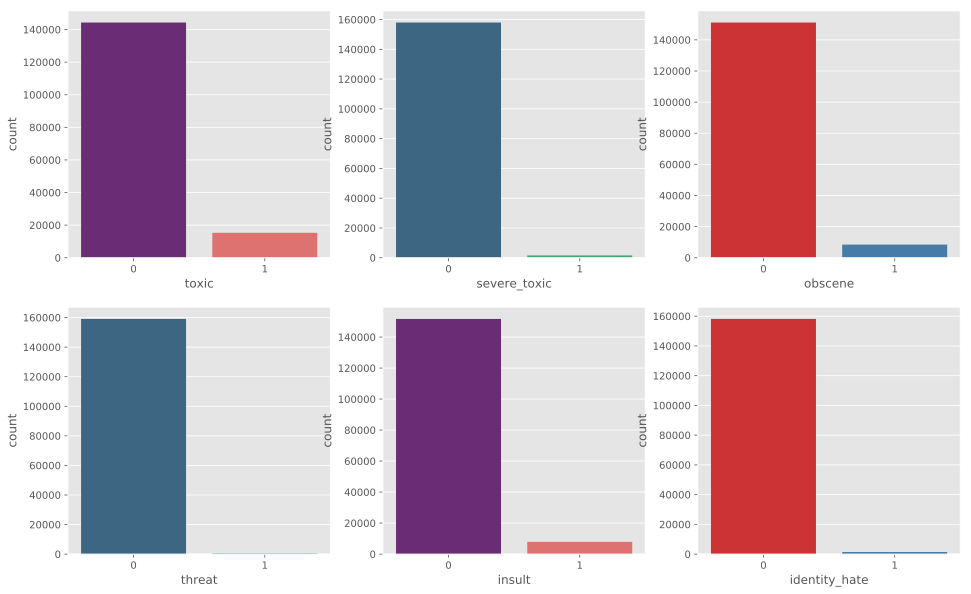

In [59]:
## Maps each imbalanced class, this cell is from https://www.kaggle.com/sudhirnl7/logistic-regression-tfidf

fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['toxic'],palette= 'magma',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(train['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(train['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train['insult'], palette = 'magma',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'Set1', ax = ax6);

Many of these classes are similar in content, let's turn this into a binary classification for the purpose of this project.

In [52]:
#make binary classification
target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
y = train[target_col]
y['sum'] = y.sum(axis=1).astype(bool).astype(int)
train['sum']=y['sum']

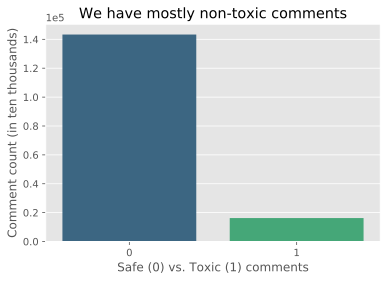

In [53]:
#make graph of class imbalance for presentation
a =sns.countplot(train['sum'], palette = 'viridis')
plt.title('We have mostly non-toxic comments')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
a.set_ylabel('Comment count (in ten thousands)');
a.set_xlabel('Safe (0) vs. Toxic (1) comments');
figure = a.get_figure()
figure.savefig('images/class_imbalance.svg',  bbox_inches='tight')


## Missing values check

In [54]:
k = pd.DataFrame()
k['train'] = train.isnull().sum()
k['test'] = test.isnull().sum()
k

,train,test
id,0,0.0
comment_text,0,0.0
toxic,0,NaN
severe_toxic,0,NaN
obscene,0,NaN
threat,0,NaN
insult,0,NaN
identity_hate,0,NaN
sum,0,NaN


## Sample content

In [55]:
train[train['insult']==1]['comment_text'].sample(5).values

array(['<><> You bunch of fwcking twssers. All you do is kick people off wikipedia and congratulate and suck each other off all day. Fwck you and fwck your false bwllshwt. I wouldnt pwss on this bwllshwt artist ALR if he was on fire. All he knows how to do is bytch over a subject he has no right of authority over - but his edits are allowed and other peoples edits are binned and denied. So deny this. FwK YOU CNTz! >>>>,',
       'personal websites \n\nPersonal websites of the subject of the article are not only permitted, they are required. Stop being a dick, please. —',
       "Fuck you.\n\n'Fuck you in the ass.'",
       "Your intelligence, insight, and manners are quite poor. And YOU'RE the vandal, obviously. Don't waste my time, loser.",
       "YOUR VERY DEEPLY OFFENDED! man you sound like a blow-jobbin' old lady. In fact you are a homosexual blow-jobbin' old lady!"],
      dtype=object)

In [56]:
##gets samples for each type of target column
from collections import defaultdict

sample_dict = defaultdict(list)

for i in target_col:
    col_sample = train[train[i]==1]['comment_text'].sample(5).values
    sample_dict[i].append(col_sample)

sample_dict

defaultdict(list,
            {'toxic': [array(['You know \n\nI am SO GOD DAMNED SICK of you holier than thou ****HEADS going in & reverting shit on a whim just cause you can! Get your shit straight before reverting shit!\n\n76.235.235.223',
                     'How about you all go fuck yourselves?',
                     'Article to be deleted\nEverything in this article is false, there is no officially named place in Afghanistan that is called Hazarajat. This article is stupid which is made by Hazara nationalists.',
                     "kiss u \n\ni missed u, u girl....what..so now they say i'm anti-pole...lol..that's like discussing magnetism...:))\n\nbitch..u fight with everyone...u Love the vandal...u can't live without him....I'm here...now feed me...maybe i'll make u happy later on..:)\n\nwhat...i don't get anything...say something...i love the way u smile...i love the way u drive....i love the way you be the one to me....i love ..i'm singing if u didnt get it...\n\nbitch.\n\n